-----------EDA-------------

- Step 1 - Columns classification i.e Numerical and Categorical Columns

- Step 2 - Univariate Analysis

- Step 3 - Bivariate Analysis

- Step 4 - Multivariate Analysis

- Step 5 - Feature Engineering 


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [126]:
df = pd.read_csv("titanic.csv")

In [127]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariate Analysis On Numerical Columns (Age and Fare)

In [130]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [131]:
df["Age"].skew()

0.38910778230082704

<Axes: ylabel='Density'>

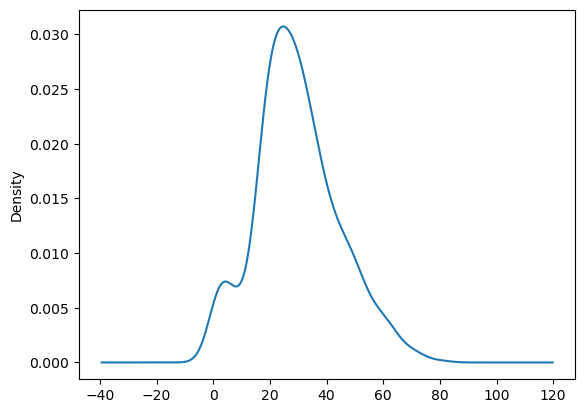

In [132]:
df["Age"].plot(kind = "kde")

<Axes: ylabel='Frequency'>

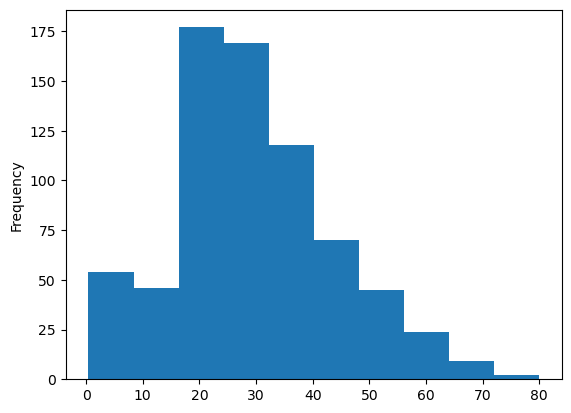

In [133]:
df["Age"].plot(kind = "hist")

<Axes: >

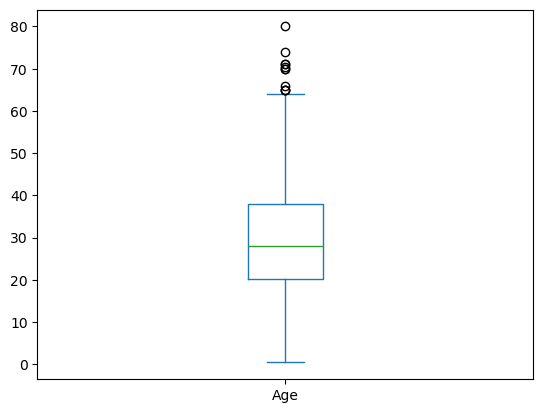

In [134]:
df["Age"].plot(kind = "box")

In [135]:
df["Age"].isna().sum()

177

In [136]:
(df["Age"].isna().sum()/len(df["Age"]))*100

19.865319865319865

Age data is  somewhat uniform and has null values

In [138]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

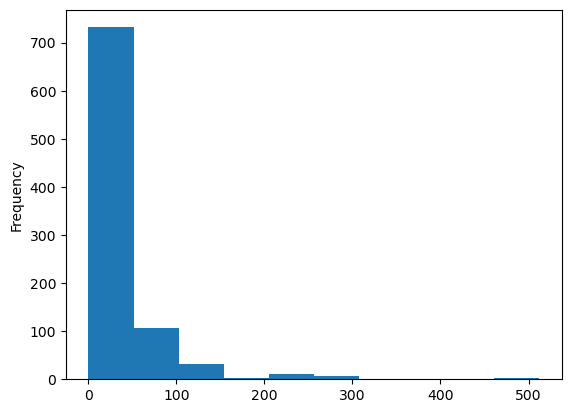

In [139]:
df["Fare"].plot(kind = "hist")

<Axes: ylabel='Density'>

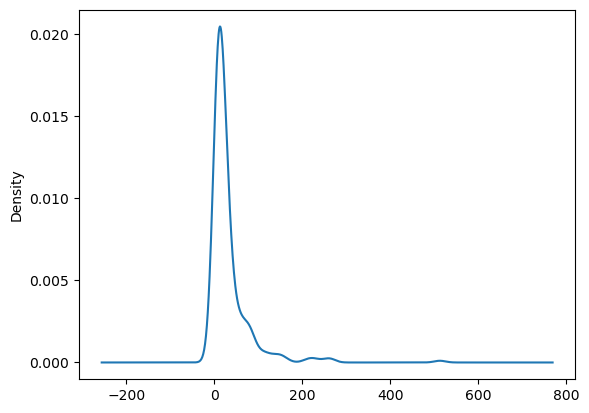

In [140]:
df["Fare"].plot(kind = "kde")

In [141]:
df["Fare"].skew()

4.787316519674893

Fare column data is positively skewed

<Axes: >

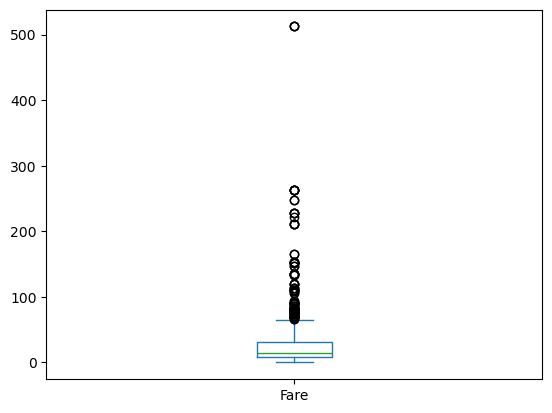

In [143]:
df["Fare"].plot(kind = "box")

In [144]:
df[df["Fare"] > 70]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


The Fare has price as group of people, i have to find individual fare

In [146]:
df["Fare"].isna().sum()

0

Fare Column has No null values

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariate Analysis of Categorical Columns (Survived, Pclass, Sex, SibSp, Parch, Embarked)

In [150]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

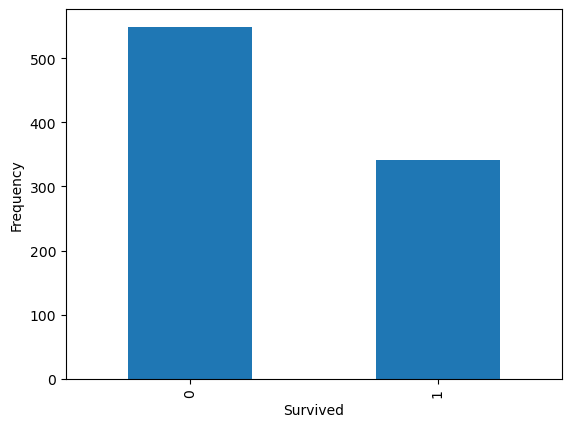

In [151]:
df["Survived"].value_counts().plot(kind = "bar")
plt.ylabel("Frequency")
plt.show()

<Axes: ylabel='count'>

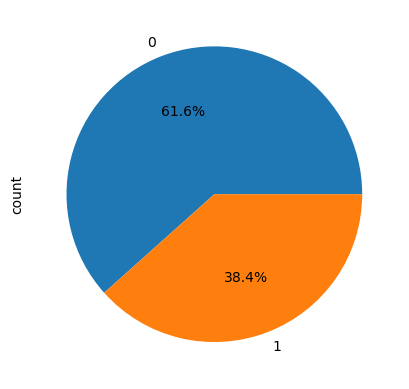

In [152]:
df["Survived"].value_counts().plot(kind = "pie",autopct = "%1.1f%%" )

In [153]:
df["Survived"].isna().sum()


0

Survived Column has No NULL values and only 38% people survived.


<Axes: xlabel='Pclass'>

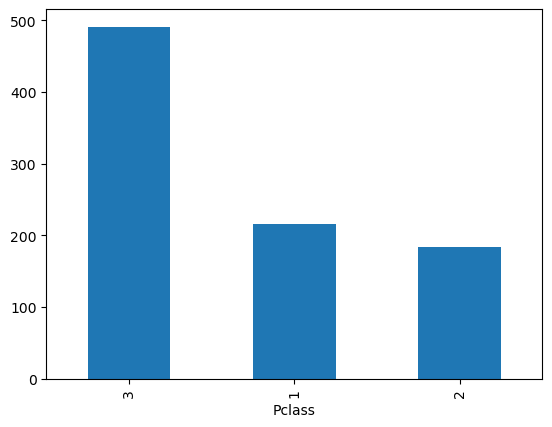

In [155]:
df["Pclass"].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

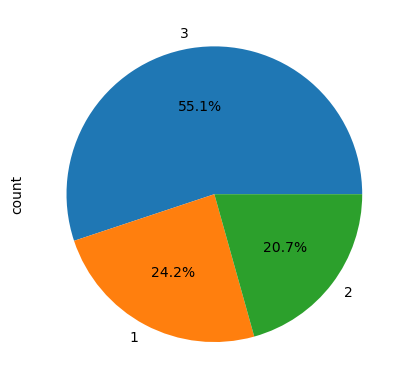

In [156]:
df["Pclass"].value_counts().plot(kind = "pie", autopct= "%1.1f%%")

In [157]:
df["Pclass"].isna().sum()


0

Pclass has no Null values, 55% people are in 3rd class, 24% in 1st class and approx 21% in 2nd class.

<Axes: xlabel='Sex'>

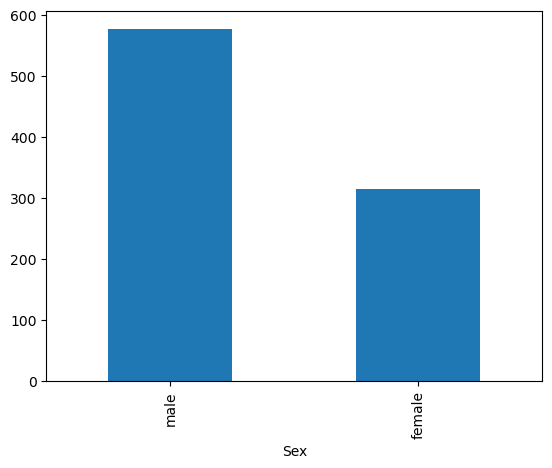

In [159]:
df["Sex"].value_counts().plot(kind = "bar")

<Axes: xlabel='Sex'>

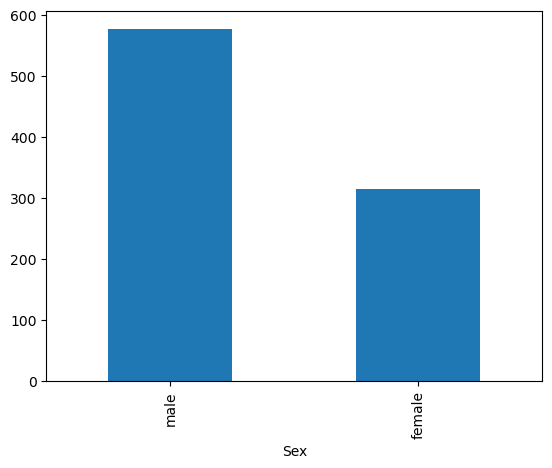

In [160]:
df["Sex"].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

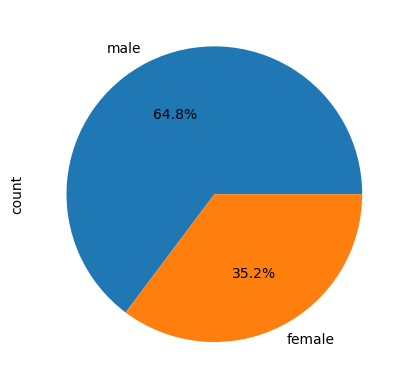

In [161]:
df["Sex"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")

In [162]:
df["Sex"].isna().sum()


0

Sex Column has No null values, around 65% of the passengers are male and 35% are female.


<Axes: xlabel='Parch'>

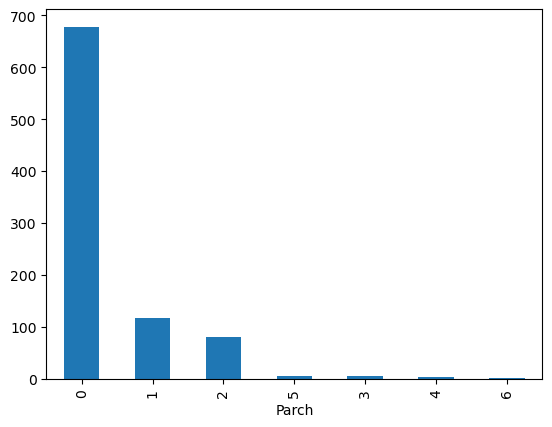

In [164]:
df["Parch"].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

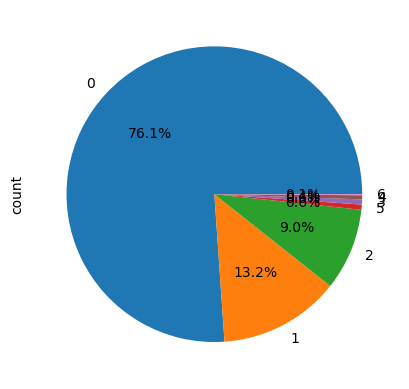

In [165]:
df["Parch"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")

In [166]:
df["Parch"].isna().sum()
# no Null values

0

Parch Column has No null values, 76% of the passengers are travelling alone.

<Axes: xlabel='SibSp'>

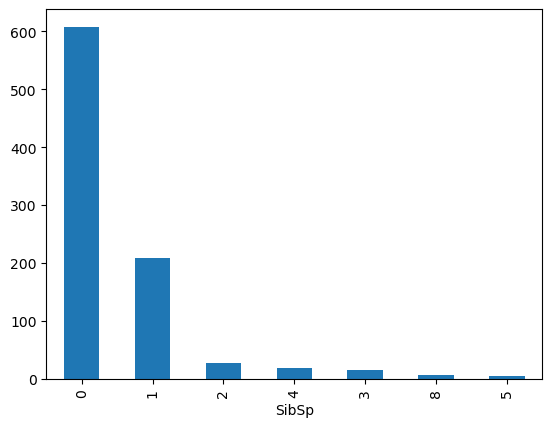

In [168]:
df["SibSp"].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

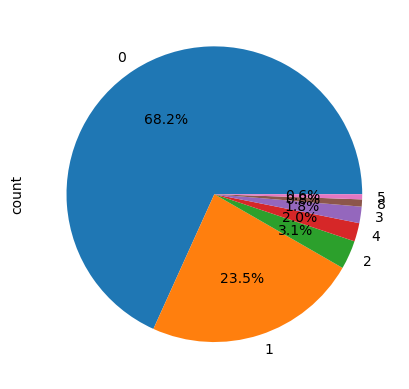

In [169]:
df["SibSp"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")

In [170]:
df["SibSp"].isna().sum()


0

SibSp has no null values

# BIVARIATE ANALYSIS

### <u>OF catagorical vs catagorical</u>

In [174]:
# Survived vs Sex

pd.crosstab(df["Survived"], df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [175]:
pd.crosstab(df["Survived"], df["Sex"], normalize = "columns")

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

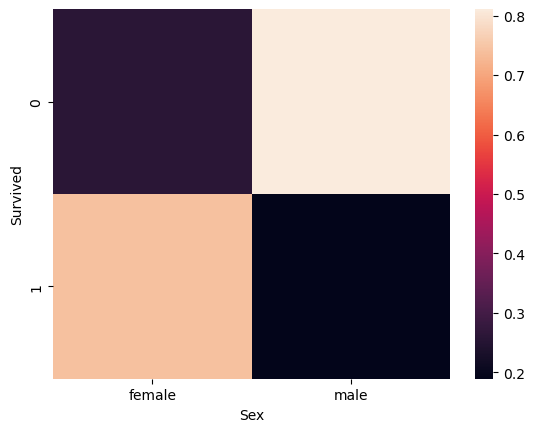

In [176]:
sns.heatmap(pd.crosstab(df["Survived"], df["Sex"], normalize = "columns"))


---------conclusion---------

Most of the female survived as compared to male

In [178]:
# Survived-PClass

pd.crosstab(df["Survived"], df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [179]:
pd.crosstab(df["Survived"], df["Pclass"], normalize = "columns")

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

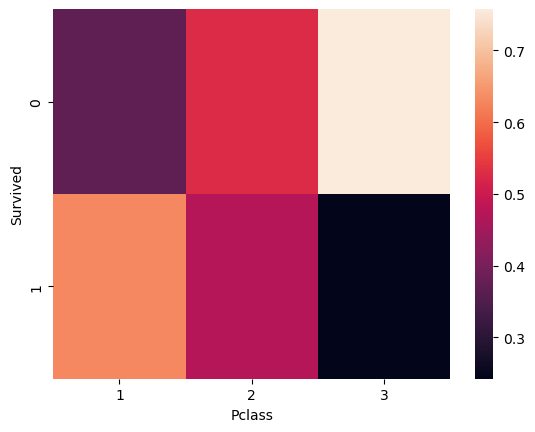

In [180]:
sns.heatmap(pd.crosstab(df["Survived"], df["Pclass"], normalize = "columns"))


---------conclusion---------

Most of the 1st class passengers have survived , then 2nd class , then 3rd class

In [182]:
# Survived-Embarked Cols

df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [183]:
pd.crosstab(df["Survived"], df["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [184]:
pd.crosstab(df["Survived"], df["Embarked"], normalize = True)

Embarked,C,Q,S
Survived,,,
0,0.084364,0.052868,0.480315
1,0.104612,0.033746,0.244094


<Axes: xlabel='Embarked', ylabel='Survived'>

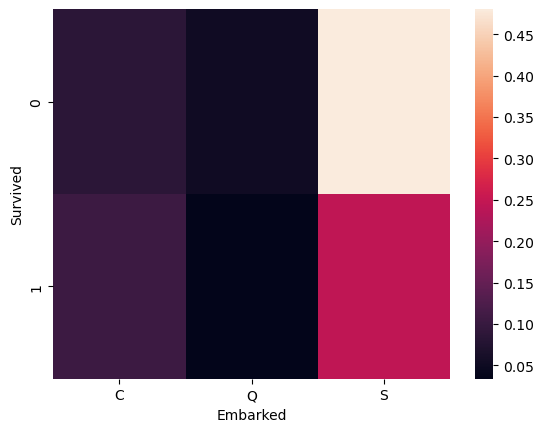

In [185]:
sns.heatmap(pd.crosstab(df["Survived"], df["Embarked"], normalize = True))



---------conclusion---------

Most of the passengers boarded from Station 'S' and they have survived the most, then from station 'C' and then 'Q'.

### <u>Categorical-Numerical</u>

In [188]:
# Survived and age
# Groupby will make groups of data in 1 and 0

df.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


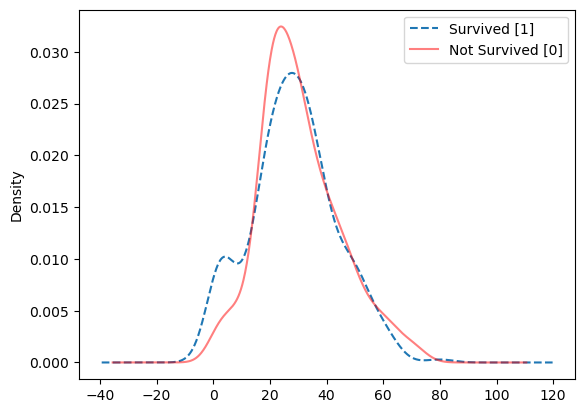

In [189]:
df[df["Survived"] == 1]["Age"].plot(kind = "kde", linestyle="dashed", label = "Survived [1]")
df[df["Survived"] == 0]["Age"].plot(kind = "kde", color = "red", alpha = 0.5, label = "Not Survived [0]")
plt.legend()
plt.show()

<Axes: title={'center': 'Survived = 0'}>

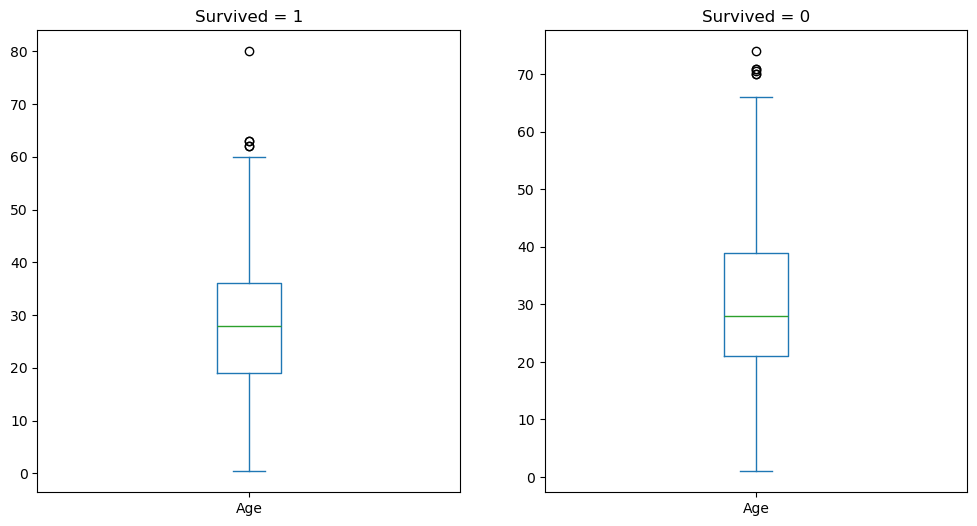

In [190]:
# Making setting to show two plots in one row
plt.figure(figsize = (12, 6))   # (height, width) in inches
plt.subplot(1, 2, 1) #  1 rows, 2 column, 1st plot

df[df['Survived'] == 1]['Age'].plot(kind='box', title='Survived = 1')
plt.subplot(1,2,2)   #  1 rows, 2 column, 2nd plot
df[df['Survived'] == 0]['Age'].plot(kind='box', title='Survived = 0')

C:\Users\NITIN\AppData\Local\Temp\ipykernel_22572\4143634117.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df["Survived"], y = df["Age"], estimator = np.max, ci = None) # ci = Confidence Interval


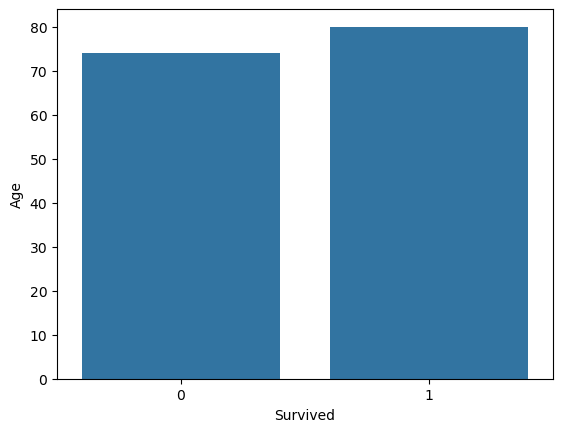

In [191]:
sns.barplot(x = df["Survived"], y = df["Age"], estimator = np.max, ci = None) # ci = Confidence Interval
# By default "estimator" works with "mean" 
plt.xlabel('Survived') 
plt.ylabel('Age')
plt.show()



---------conclusion---------

- Most of The polulation who survived  is between age group of 20 - 35 .
- Most of The polulation who dont survived  is  around age 23 - 40.
- Max age of a person who servived is 80.
- Max age of a person who don't Survived is 74.

In [246]:
# Sex and Age

df.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


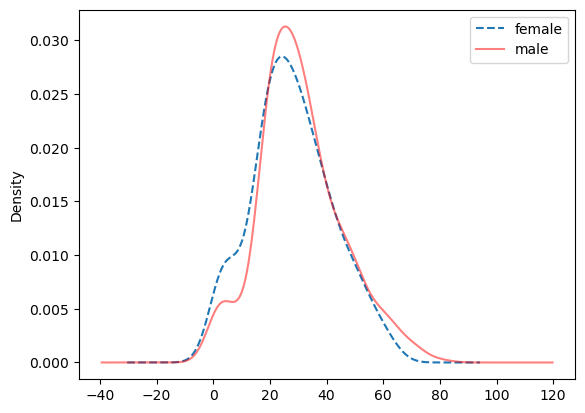

In [262]:
df[df["Sex"] == "female"]["Age"].plot(kind = "kde", linestyle = "dashed", label = "female")
df[df["Sex"] == "male"]["Age"].plot(kind = "kde", color = "red", alpha = 0.5, label = "male")
plt.legend()
plt.show()

<Axes: title={'center': 'Male'}>

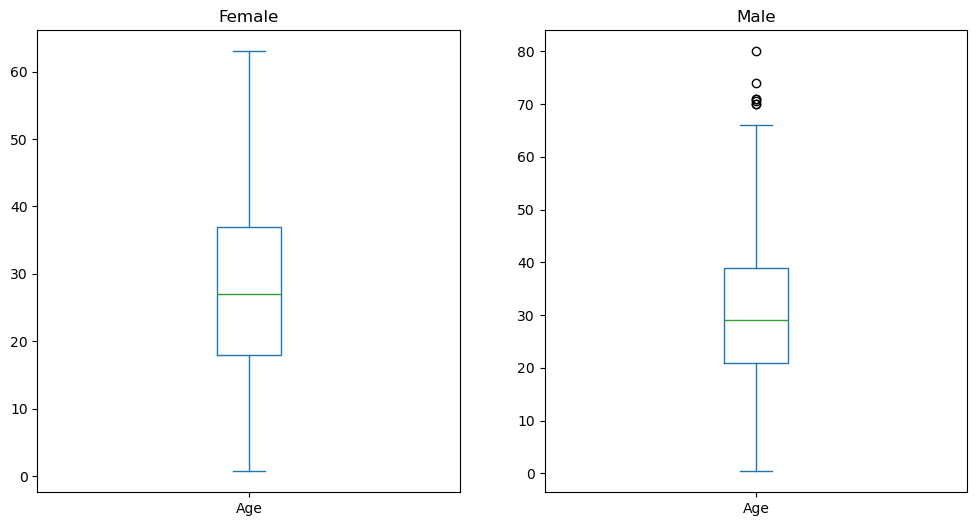

In [274]:
plt.figure(figsize = (12, 6) )
plt.subplot(1, 2, 1)
df[df["Sex"] == "female"]["Age"].plot(kind = "box", title = "Female")
plt.subplot(1, 2, 2)
df[df["Sex"] == "male"]["Age"].plot(kind = "box", title = "Male")

C:\Users\NITIN\AppData\Local\Temp\ipykernel_22572\2964940775.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df["Sex"], y = df["Age"], estimator = np.max ,ci = None)


<Axes: xlabel='Sex', ylabel='Age'>

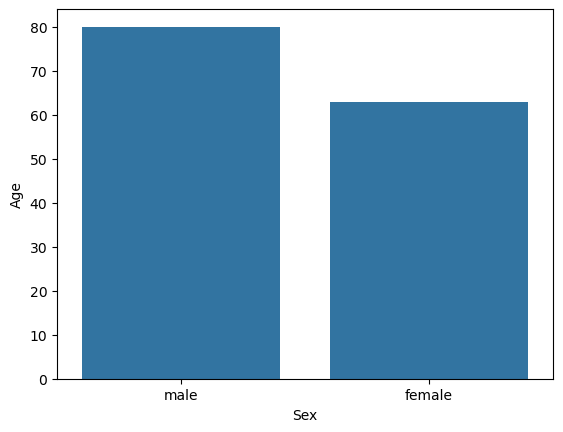

In [264]:
sns.barplot(x = df["Sex"], y = df["Age"], estimator = np.max ,ci = None) 

------------Conclusion--------------- 
- Maximum age of male who was travelling is around 80.
- Maximum age of female who was travelling is around 65.
- Most of the female travellers are of age around 17 - 35.
- Most of the male travellers are of ge around 20 - 40.

In [281]:
# Pclass and Age